# IBM Applied Data Science Capstone Course by Coursera

# Finding a Best Location In Newyork Neighborhoods To Start An Indian Restaurent 

##  Installing and Importing Python Libraries

In [12]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
!pip install geocoder
import geocoder
import os
!pip install folium
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from pandas.io.html import read_html
%matplotlib inline
from pandas.io.json import json_normalize

print('Libraries imported.')

Libraries imported.


##  Data Extraction And Cleaning

#### EXTRACTING NEWYORK CITY DATA AND ITS BOROUGHS

In [9]:
import requests
import pandas as pd
url='https://cocl.us/new_york_dataset'
resp=requests.get('https://cocl.us/new_york_dataset').json()
    # all data is present in features label
features=resp['features']
    
    # define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
new_york_data = pd.DataFrame(columns=column_names)
    
for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
new_york_data

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
...,...,...,...,...
301,Manhattan,Hudson Yards,40.756658,-74.000111
302,Queens,Hammels,40.587338,-73.805530
303,Queens,Bayswater,40.611322,-73.765968
304,Queens,Queensbridge,40.756091,-73.945631


In [5]:
url='https://cocl.us/new_york_dataset'
resp=requests.get('https://cocl.us/new_york_dataset').json()
    # all data is present in features label
features=resp['features']
    
    # define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
new_york_data = pd.DataFrame(columns=column_names)
    
for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
new_york_data.Borough.unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

 There are 5 Boroughs in Newyork City 

### Extracting Indian Population Of Each Borough By Web Scraping a Wikipedia Table 

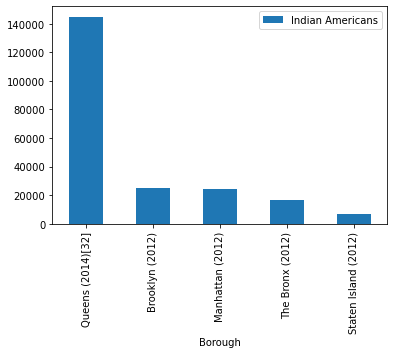

In [8]:
url="https://en.wikipedia.org/wiki/Indians_in_the_New_York_City_metropolitan_region"

table=read_html(url, attrs={"class":"wikitable sortable"})

df=pd.DataFrame(table[0])


df=df.dropna()
df=df.set_index('Rank')

df.plot(x = "Borough", y = "Indian Americans", kind = "bar")
plt.show()

Queens Neighborhood has the Highest Number Of Indians.

### Exploring Neighberhoods of Queens Borough 

In [9]:
Queens_data = new_york_data[new_york_data['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138
5,Queens,Corona,40.742382,-73.856825
6,Queens,Forest Hills,40.725264,-73.844475
7,Queens,Kew Gardens,40.705179,-73.829819
8,Queens,Richmond Hill,40.697947,-73.831833
9,Queens,Flushing,40.764454,-73.831773


In [11]:
Queens_data.Neighborhood.size

81

There are 81 neighborhoods In Queens Borough.

### Extracting Indian Restaurents Information in Neighborhoods Of Queens Borough Using Foursquare API  

In [22]:
address = 'QUEENS, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)

latitude = location.latitude
longitude = location.longitude
VERSION = '20180604'
#LIMIT = 100
search_query = 'Indian restaurents'
#radius = 5000
CLIENT_ID = 'BBIQNU4IEGF4KHHEEN3M2OOCLIGFJWWMMARXZWIG04UJCO4N' # your Foursquare ID
CLIENT_SECRET = 'VQF421BDAANPRC3LMJ1STDJFCV1EUOHG4BQMDFOVEDLQM3FR' # your Foursquare Secret
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query)
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,Indian Curry Express,Indian Restaurant,13109 Jamaica Ave,40.702128,-73.819951,"[{'label': 'display', 'lat': 40.70212767659504...",5633,11418,US,Richmond Hill,NY,United States,"[13109 Jamaica Ave, Richmond Hill, NY 11418, U...",NaN,NaN,4c954d346b35a143dc0124dc
1,South Indian Hindu Temple,Hindu Temple,14307 Holly Ave,40.752567,-73.816597,"[{'label': 'display', 'lat': 40.75256729125976...",1628,11355,US,Flushing,NY,United States,"[14307 Holly Ave, Flushing, NY 11355, United S...",NaN,NaN,4cb0ff8e562d224b827b1b88
2,Punjabi Indian & American Restaurant,Indian Restaurant,160-20 46th Ave,40.753916,-73.805918,"[{'label': 'display', 'lat': 40.75391568666028...",833,11358,US,Flushing,NY,United States,"[160-20 46th Ave (160st and 46th ave), Flushin...",160st and 46th ave,NaN,4c60797a90b2c9b648e03c22
3,Kabul Halal Meat and Indian,Food,4224 College Point Blvd,40.754398,-73.833199,"[{'label': 'display', 'lat': 40.754398, 'lng':...",3042,11355,US,Flushing,NY,United States,"[4224 College Point Blvd, Flushing, NY 11355, ...",NaN,NaN,4f32918f19836c91c7e488a2
4,Rags' Indian cuisine,Indian Restaurant,NaN,40.772478,-73.819038,"[{'label': 'display', 'lat': 40.77247759219799...",3101,11354,US,Flushing,NY,United States,"[Flushing, NY 11354, United States]",NaN,NaN,5025d218e4b06553e1ba0792
5,Agra Indian Cuisine,Indian Restaurant,213-35 39th Ave,40.765396,-73.771535,"[{'label': 'display', 'lat': 40.76539561313631...",2801,11361,US,Bayside,NY,United States,"[213-35 39th Ave, Bayside, NY 11361, United St...",NaN,NaN,502063b4e4b0c49dd7e1f9b5
6,Indian Park Towers,Residential Building (Apartment / Condo),579 W 215th St New York‎ New York United States,40.871642,-73.918220,"[{'label': 'display', 'lat': 40.87164165924491...",16944,NaN,US,Manhattan,NY,United States,[579 W 215th St New York‎ New York United Stat...,NaN,NaN,4cb081ac562d224b6dcf1688
7,Indian Larry Motorcycles NYC,Building,70 N 15th St,40.712322,-73.951320,"[{'label': 'display', 'lat': 40.71232231166012...",13619,11222,US,Brooklyn,NY,United States,"[70 N 15th St (at Ainslie St.), Brooklyn, NY 1...",at Ainslie St.,NaN,4c952ca038dd8cfab44cd062
8,Lenny's West Indian Cookhouse,Indian Restaurant,112-06 Liberty Ave,40.684943,-73.829911,"[{'label': 'display', 'lat': 40.68494332523756...",7718,11419,US,Jamaica,NY,United States,"[112-06 Liberty Ave, Jamaica, NY 11419, United...",NaN,NaN,5ef12de4f9ff2a00089e716e
9,Ruby Divine Indian Dining,Indian Restaurant,25 Middle Neck Rd,40.787410,-73.727820,"[{'label': 'display', 'lat': 40.78741, 'lng': ...",7221,11021,US,Great Neck Plaza,NY,United States,"[25 Middle Neck Rd, Great Neck Plaza, NY 11021...",NaN,NaN,59e9374aa423622886d4f3fa


### conclusion: 

From the above table it is seen that except jamaica,bayside,flushing,queens village,richmond hills,ozone park, remaining all neighborhoods of queens have lack of indian restaurents.

 QUEENS AND ITS NEIGHBORHOODS ARE BEST PLACE TO START AN INDIAN RESTAURENT .